In [1]:
import pandas as pd
# ai synthetic metal xauusd https://www.myfxbook.com/members/MamonovR/ai-synthetic-metal-xauusd/11530947
df = pd.read_csv('data/syntheticmetal.csv')
df = df.ffill().bfill().fillna(0)
df

,Tags,Open Date,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,...,Drawdown,Risk:Reward,Max(pips),Max(USD),Min(pips),Min(USD),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(USD)
0,Open Trades,08/01/2025 23:43,08/01/2025 15:32,XAUUSD,Deposit,0.000,0.00000,0.00000,0.0000,0.00,...,3597.0,0.00,6754.0,67.54,0.0,0.00,100.0,46.7,-3597.0,-35.97
1,Open Trades,08/01/2025 15:32,08/01/2025 15:32,XAUUSD,Sell,0.050,3321.28000,3320.80000,0.0000,0.00,...,3597.0,0.00,6754.0,67.54,0.0,0.00,100.0,46.7,-3597.0,-35.97
2,Open Trades,08/01/2025 11:01,08/01/2025 15:31,XAUUSD,Buy,0.010,3286.59000,3318.16000,0.0000,0.00,...,3597.0,0.00,6754.0,67.54,0.0,0.00,100.0,46.7,-3597.0,-35.97
3,Open Trades,08/01/2025 10:32,08/01/2025 15:31,XAUUSD,Buy,0.010,3289.14000,3318.11000,0.0000,0.00,...,3602.0,0.00,6499.0,64.99,0.0,0.00,100.0,44.6,-3602.0,-36.02
4,Open Trades,07/31/2025 22:28,08/01/2025 15:31,XAUUSD,Buy,0.010,3291.45000,3318.11000,0.0000,-0.38,...,3487.0,0.15,6153.0,61.53,-925.0,-9.25,86.9,50.7,-3487.0,-34.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,Tags,08/01/2025 16:10,XAUUSD,Sell,0.030,3348.64,-44.37,-1479.0,0.0,0.00,...,432.0,0.00,448.0,13.44,0.0,0.00,100.0,3.6,-432.0,-12.96
2504,Tags,08/01/2025 16:16,XAUUSD,Sell,0.020,3353.54,-19.78,-989.0,0.0,0.00,...,432.0,0.00,448.0,13.44,0.0,0.00,100.0,3.6,-432.0,-12.96
2505,Tags,08/01/2025 17:01,XAUUSD,Sell,0.020,3350.62,-25.62,-1281.0,0.0,0.00,...,432.0,0.00,448.0,13.44,0.0,0.00,100.0,3.6,-432.0,-12.96
2506,Tags,08/01/2025 18:05,XAUUSD,Sell,0.030,3345.52,-53.73,-1791.0,0.0,0.00,...,432.0,0.00,448.0,13.44,0.0,0.00,100.0,3.6,-432.0,-12.96


In [2]:
df["Open Date"].min()

'04/24/2025 09:46'

In [3]:
df.columns

Index(['Tags', 'Open Date', 'Close Date', 'Symbol', 'Action', 'Units/Lots',
       'Open Price', 'Close Price', 'Commission', 'Swap', 'Pips', 'Profit',
       'Gain', 'Comment', 'Magic Number', 'Duration (DD:HH:MM:SS)',
       'Profitable(%)', 'Profitable(time duration)', 'Drawdown', 'Risk:Reward',
       'Max(pips)', 'Max(USD)', 'Min(pips)', 'Min(USD)', 'Entry Accuracy(%)',
       'Exit Accuracy(%)', 'ProfitMissed(pips)', 'ProfitMissed(USD)'],
      dtype='object')

In [4]:
import datetime

buy_trades = df[df['Action'] == 'Buy']
durations = buy_trades['Duration (DD:HH:MM:SS)'].dropna()

def duration_to_seconds(duration_str):
    dd, hh, mm, ss = map(int, duration_str.split(':'))
    return dd*86400 + hh*3600 + mm*60 + ss

seconds = durations.apply(duration_to_seconds)
median_seconds = seconds.median()

median_duration = str(datetime.timedelta(seconds=int(median_seconds)))
print("Median trade duration for Buy trades:", median_duration)

Median trade duration for Buy trades: 0:01:24


/var/folders/wq/5r6js2g51j3_3fb1s5zd343w0000gn/T/ipykernel_55975/1212742289.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^XAU',interval="1m", period="max")
[*********************100%***********************]  1 of 1 completed
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


<Axes: xlabel='Datetime'>

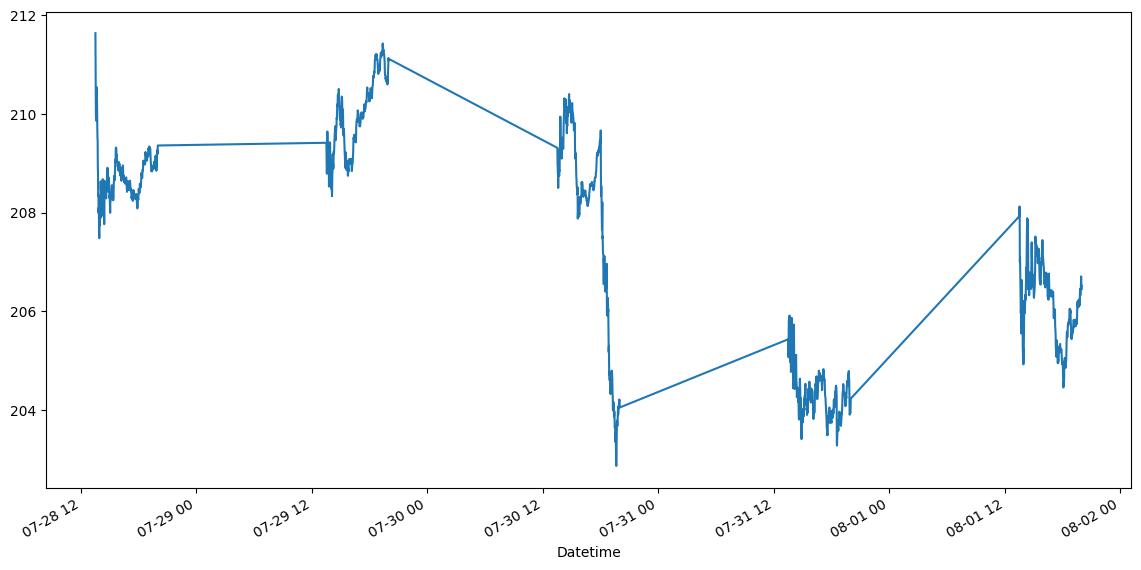

In [5]:
import yfinance as yf
from ta import add_all_ta_features
import matplotlib.pyplot as plt

data = yf.download('^XAU',interval="1m", period="max")
# swap multilevel index
data = data.swaplevel(axis=1)
data = data["^XAU"]
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data = data.ffill().bfill().fillna(0)
data['Close'].plot(figsize=(14, 7))


In [6]:
import numpy as np

# Initialize signal column with zeros
data['signal'] = 0

def nearest_slot(ts, slots):
    # Find the slot in slots that is closest to ts
    return slots[np.argmin(np.abs(slots - ts))]

for idx, row in df.iterrows():
    if row['Action'] in ['Buy', 'Sell'] and pd.notnull(row['Open Date']) and pd.notnull(row['Close Date']):
        open_dt = pd.to_datetime(row['Open Date'], utc=True)
        close_dt = pd.to_datetime(row['Close Date'], utc=True)
        # Find nearest slot in data.index
        open_slot = nearest_slot(open_dt, data.index)
        close_slot = nearest_slot(close_dt, data.index)
        if row['Action'] == 'Buy':
            data.at[open_slot, 'signal'] = 1
            data.at[close_slot, 'signal'] = -1
        elif row['Action'] == 'Sell':
            data.at[open_slot, 'signal'] = -1
            data.at[close_slot, 'signal'] = 1

data["signal"].value_counts()

signal
 0    1853
 1      46
-1      36
Name: count, dtype: int64

## now that we have signal try to correlate

<Axes: title={'center': 'Trading Signals'}, xlabel='Datetime'>

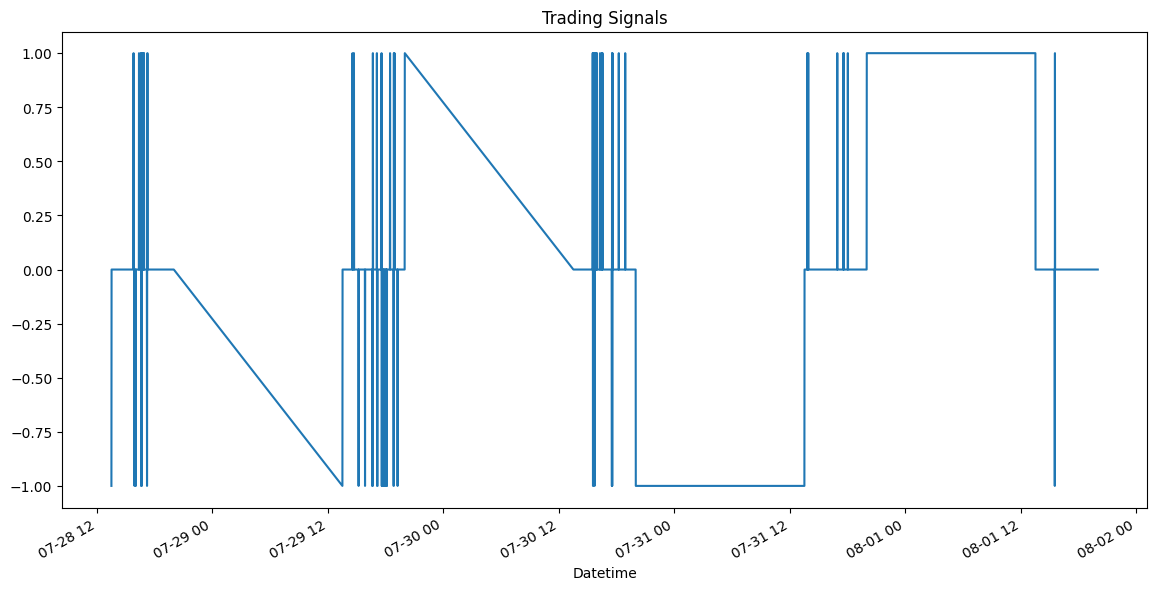

In [7]:
data["signal"].plot(figsize=(14, 7), title="Trading Signals")

## adapt signal

i want to have it at either -1 or 1 depending on the last value until the other appears


<Axes: title={'center': 'Adapted Trading Signal'}, xlabel='Datetime'>

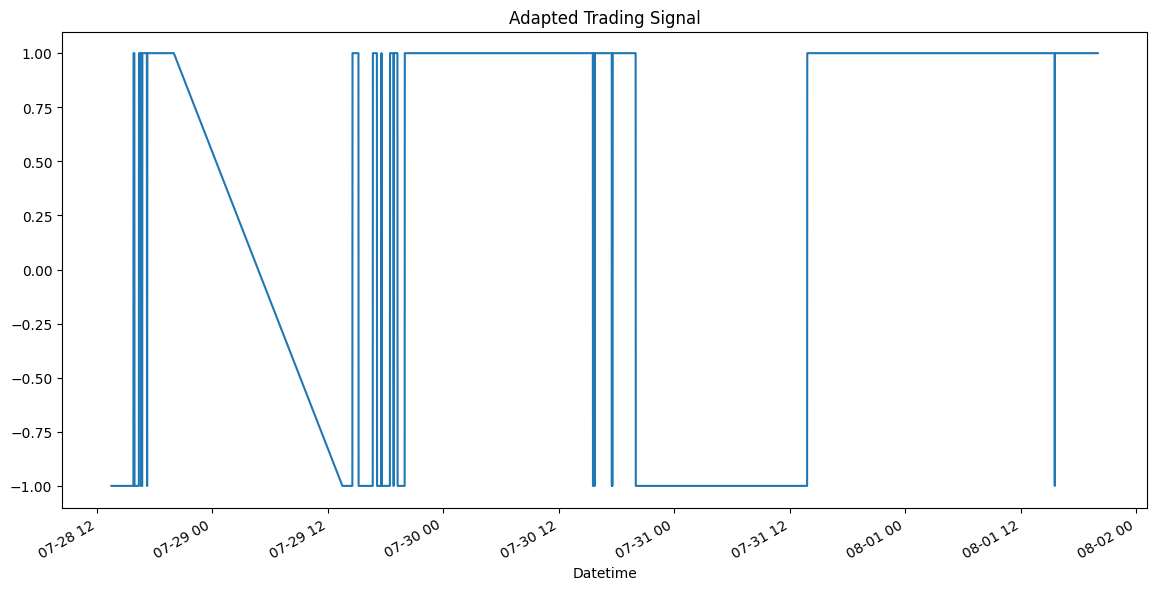

In [8]:
# Adapt signal: fill forward with last non-zero value, then map to -1 or 1
def adapt_signal(series):
    # Replace zeros with NaN, then forward fill
    s = series.replace(0, np.nan).ffill()
    # If still NaN (at start), fill with first non-zero value
    first_nonzero = s.dropna().iloc[0] if not s.dropna().empty else 1
    s = s.fillna(first_nonzero)
    # Map all non-negative to 1, negative to -1
    return np.where(s < 0, -1, 1)

data["adapted_signal"] = adapt_signal(data["signal"])
data["adapted_signal"].plot(figsize=(14, 7), title="Adapted Trading Signal")

## clean signal

if a lot of changes between 1 and -1 are close to another, ignore them to "smoothen" the signal

<Axes: title={'center': 'Cleaned Trading Signal'}, xlabel='Datetime'>

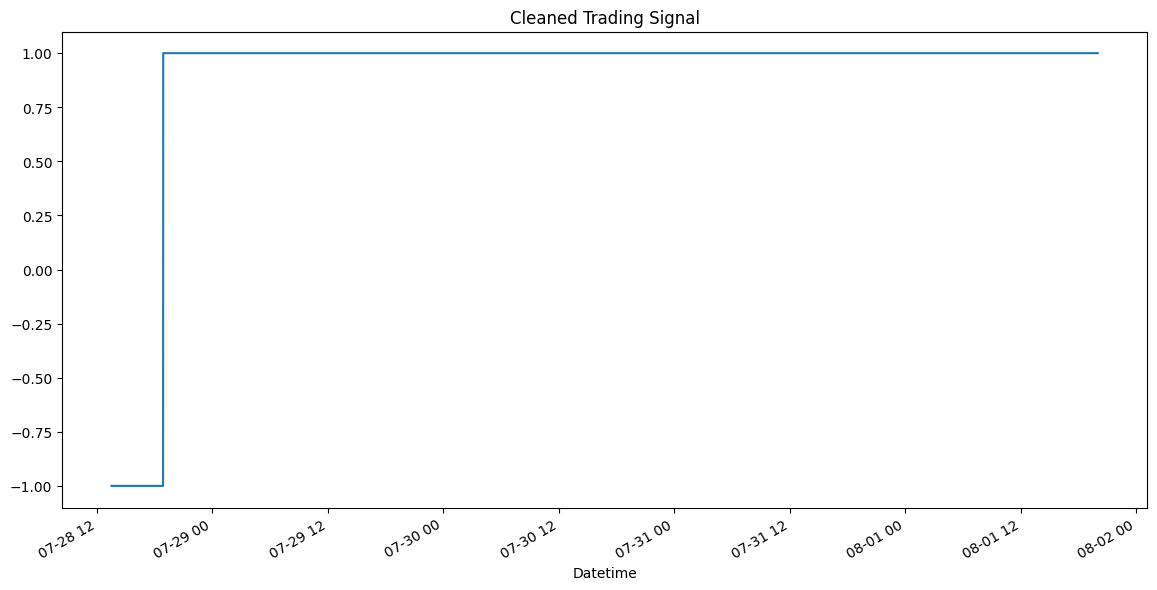

In [9]:
def smooth_signal(signal, min_interval=5):
    smoothed = signal.copy()
    current_value = smoothed.iloc[0]
    pending_value = current_value
    count = 0
    for i in range(1, len(smoothed)):
        if smoothed.iloc[i] != current_value:
            if smoothed.iloc[i] == pending_value:
                count += 1
            else:
                pending_value = smoothed.iloc[i]
                count = 1
            if count >= min_interval:
                current_value = pending_value
                count = 0
        else:
            count = 0
            pending_value = current_value
        smoothed.iloc[i] = current_value
    return smoothed

data["signal"] = smooth_signal(data["adapted_signal"], min_interval=100)
data["signal"].plot(figsize=(14, 7), title="Cleaned Trading Signal")


### finetune signal smoothing

In [10]:
def tradeMetric(trades):
    return np.median(trades) * len(trades) / 100

In [11]:

def oneRun(signalthreshold = 100, startMoney = 10000, signalcolumnname="signal"):
    money = startMoney
    nrStocks = 0
    portfolio = []
    buyHold = []
    boughtAt = 0
    trades = []

    data[signalcolumnname] = smooth_signal(data["adapted_signal"], min_interval=signalthreshold)

    for i in range(len(data)):
        if data[signalcolumnname].iloc[i] == 1 and money > 0:
            # Buy signal
            nrStocks += money / data["Close"].iloc[i]
            money = 0
            boughtAt = data["Close"].iloc[i]
        elif data[signalcolumnname].iloc[i] == -1 and nrStocks > 0:
            # Sell signal
            money += nrStocks * data["Close"].iloc[i]
            nrStocks = 0
            win = data["Close"].iloc[i] - boughtAt
            trades.append(win)
        portfolio.append(money + nrStocks * data["Close"].iloc[i])
        buyHold.append(data["Close"].iloc[i] * startMoney / data["Close"].iloc[0])
    myTradeMetric = tradeMetric(trades)
    return portfolio, buyHold, trades, myTradeMetric

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=100)
# build a metric which favors high median trades, but also rewards if there are many trades more
print("Final portfolio value:", portfolio[-1])
print("Final buy and hold value:", buyHold[-1])
print("median trade win:", np.median(trades))
print("myTradeMetric:", myTradeMetric)
print("win over buyhold:", portfolio[-1] - buyHold[-1])

Final portfolio value: 9872.381180868459
Final buy and hold value: 9755.084834175606
median trade win: nan
myTradeMetric: nan
win over buyhold: 117.29634669285224


/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
from random import randint
from tqdm import tqdm
bestWinOverBuyHold = -1000000
bestTradeMetric = -1000000
bestSettings = dict()

allSims = []

for signalthreshold in tqdm([1,5,8,10, 50, 100, 200, 500] + [randint(1, 1000) for _ in range(100)]):
    portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalthreshold)

    allSims.append({
        "signalthreshold": signalthreshold,
        "finalPortfolio": portfolio[-1],
        "finalBuyHold": buyHold[-1],
        "medianTrade": np.median(trades) if trades else 0,
        "myTradeMetric": myTradeMetric,
        "winOverBuyHold": portfolio[-1] - buyHold[-1],
        "nrTrades": len(trades),
    })

    winOverBuyHold = portfolio[-1] - buyHold[-1]
    if myTradeMetric > bestTradeMetric:
        bestTradeMetric = myTradeMetric
        bestSettings = allSims[-1]
print("Best win over buy and hold:", bestTradeMetric)
print("Best settings:", bestSettings) # 575

allSims = pd.DataFrame(allSims)



100%|██████████| 108/108 [00:05<00:00, 19.32it/s]

Best win over buy and hold: 0.0117669677734375
Best settings: {'signalthreshold': 60, 'finalPortfolio': np.float64(9892.681830424388), 'finalBuyHold': np.float64(9755.084834175606), 'medianTrade': np.float64(1.17669677734375), 'myTradeMetric': np.float64(0.0117669677734375), 'winOverBuyHold': np.float64(137.59699624878158), 'nrTrades': 1}


best finalPortfolio: 449, 3 trades
best medianTrade with at least 5 trades: 267, 5 trades, winOverBuyHold 51
best myTradeMetric: 5, win over buyhold 71, 25 trades, 10247 usd 
best signalthres 1 performs good as well, 71 winoverbuyhold, 25 trades 

In [13]:
allSims = allSims.sort_values(by="medianTrade", ascending=False)
allSims.head(10)

,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
103,60,9892.681830,9755.084834,1.176697,0.011767,137.596996,1
60,55,9867.094610,9755.084834,0.997009,0.009970,112.009776,1
83,57,9879.938290,9755.084834,0.955200,0.009552,124.853456,1
4,50,9865.644319,9755.084834,0.890900,0.008909,110.559485,1
34,44,9853.759725,9755.084834,0.630508,0.006305,98.674891,1
22,44,9853.759725,9755.084834,0.630508,0.006305,98.674891,1
65,79,9842.556265,9755.084834,0.490707,0.004907,87.471431,1
14,77,9845.627435,9755.084834,0.467697,0.004677,90.542601,1
19,63,9852.295335,9755.084834,0.230606,0.002306,97.210501,1
84,21,9851.892288,9755.084834,0.119049,0.004762,96.807454,4


Text(0.5, 1.0, 'Final Portfolio Value vs Signal Threshold')

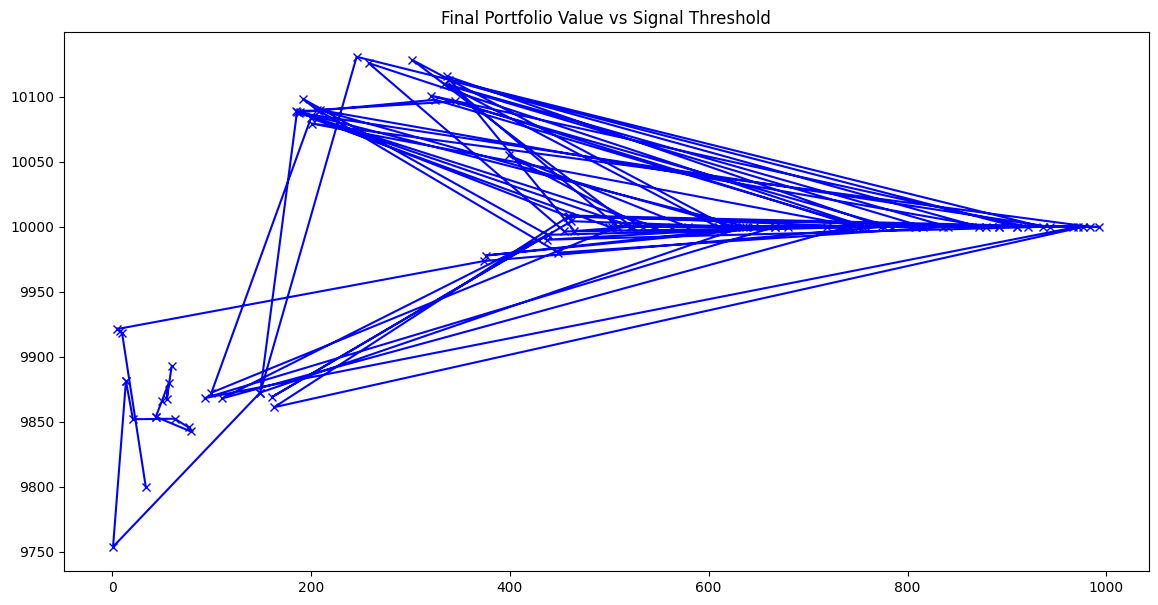

In [14]:
# plot signalthreshold x, finalPortfolio y
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(allSims['signalthreshold'], allSims['finalPortfolio'], marker='x', color='b')
plt.title('Final Portfolio Value vs Signal Threshold')

/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

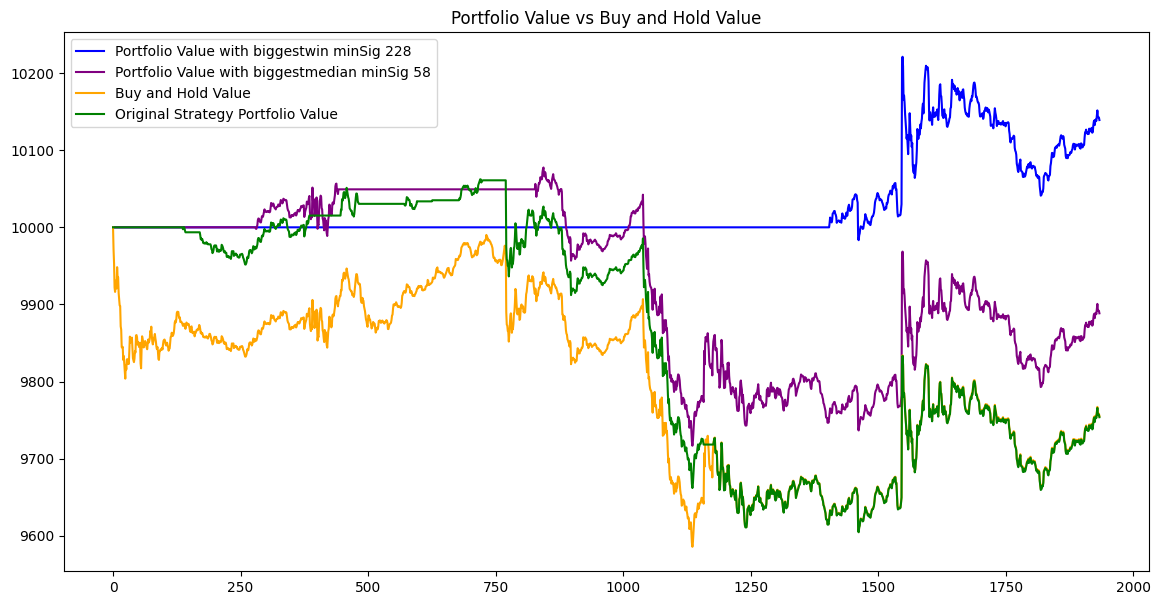

In [15]:
signalThresholdBiggestWin = 228 # 476 biggest win, 5 biggest median trades
signalThresholdBiggestMedianTrades = 58

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalThresholdBiggestWin)
portfolioBiggestMedianTrades, buyHoldBiggestMedianTrades, tradesBiggestMedianTrades, myTradeMetricBiggestMedianTrades = oneRun(signalthreshold=signalThresholdBiggestMedianTrades)
portfolioOriginalStrategy, buyHoldOriginalStrategy, tradesOriginalStrategy, myTradeMetricOriginalStrategy = oneRun(signalthreshold=1)
plt.figure(figsize=(14, 7))
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

In [16]:
data["signal"] = smooth_signal(data["adapted_signal"], min_interval=476)

# correlations

In [17]:
# Correlation of 'signal' with all other columns
data = data.drop(["adapted_signal"], axis=1)

data.corr()["signal"].sort_values(ascending=False)

Price
signal                  1.000000
volatility_bbli         0.044774
trend_adx_neg           0.035300
trend_vortex_ind_neg    0.026774
trend_macd              0.021381
                          ...   
volume_mfi                   NaN
volume_nvi                   NaN
momentum_pvo                 NaN
momentum_pvo_signal          NaN
momentum_pvo_hist            NaN
Name: signal, Length: 92, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

# Example: Use all columns except 'signal' as features, and 'signal' as target
# Map signal values to 0, 1, 2 for classifier compatibility
y_mapped = data['signal'].map({-1: 0, 1: 1})
X = data.drop(columns=['signal'])
y = y_mapped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# Remove inf and -inf values from X_train and X_test
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaNs with 0 (or use another strategy if preferred)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [19]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00        55

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387

Accuracy: 1.0


In [20]:
# Print top 10 feature importances
importances = clf.feature_importances_
feature_names = X_train.columns
top_indices = np.argsort(importances)[::-1][:10]
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

volatility_dcl: 0.4666
volatility_atr: 0.2808
volatility_dch: 0.2374
volatility_kch: 0.0102
volatility_bbm: 0.0051
volatility_dcw: 0.0000
volatility_kcl: 0.0000
volatility_kcw: 0.0000
volatility_kcp: 0.0000
volatility_kchi: 0.0000


## reduce tree size

In [21]:
for maxdepth in range(1, 11):
    for maxfeatures in range(1, 11):
        clf = DecisionTreeClassifier(max_depth=maxdepth, max_features=maxfeatures)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Max Depth: {maxdepth}, Max Features: {maxfeatures}")
        # print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("-" * 50)

# Preferred parameters: {'param_max_depth': 18, 'param_max_features': 19}
# Preferred accuracy: 0.9155456910299452

Max Depth: 1, Max Features: 1
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 2
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 3
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 4
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 5
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 6
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 7
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 8
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth: 1, Max Features: 9
Accuracy: 0.8578811369509044
--------------------------------------------------
Max Depth:

In [22]:
clf = DecisionTreeClassifier(max_depth=5) #
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.98      1.00      0.99        55

    accuracy                           1.00       387
   macro avg       0.99      1.00      0.99       387
weighted avg       1.00      1.00      1.00       387

Accuracy: 0.9974160206718347
--------------------------------------------------


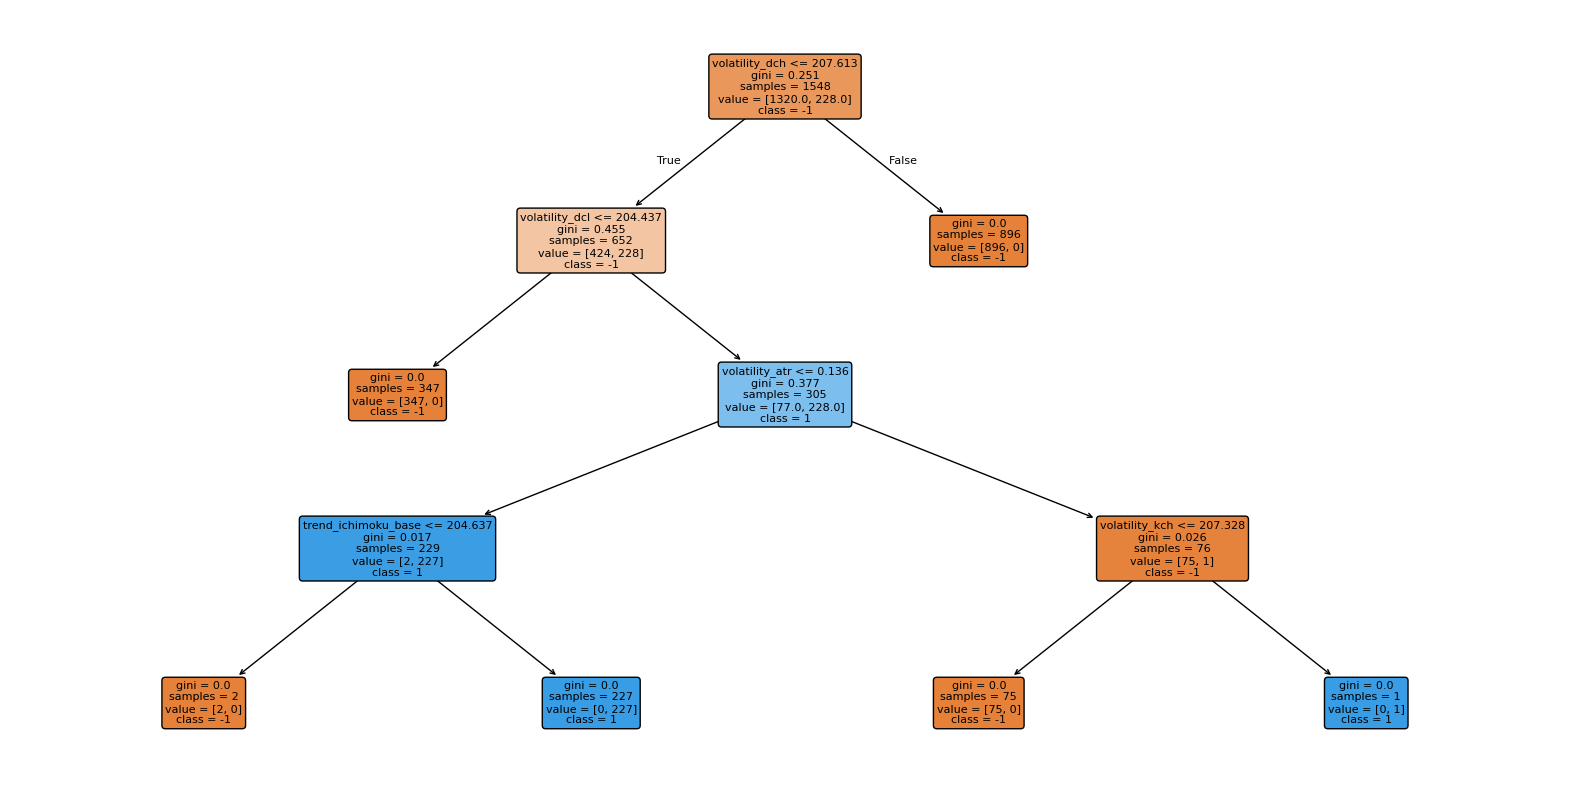

In [23]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=['-1', '1'], filled=True, rounded=True, fontsize=8)
plt.show()

In [24]:
from sklearn.tree import export_text

# Export the decision tree as a set of if-else rules
tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)

|--- volatility_dch <= 207.61
|   |--- volatility_dcl <= 204.44
|   |   |--- class: 0
|   |--- volatility_dcl >  204.44
|   |   |--- volatility_atr <= 0.14
|   |   |   |--- trend_ichimoku_base <= 204.64
|   |   |   |   |--- class: 0
|   |   |   |--- trend_ichimoku_base >  204.64
|   |   |   |   |--- class: 1
|   |   |--- volatility_atr >  0.14
|   |   |   |--- volatility_kch <= 207.33
|   |   |   |   |--- class: 0
|   |   |   |--- volatility_kch >  207.33
|   |   |   |   |--- class: 1
|--- volatility_dch >  207.61
|   |--- class: 0



In [25]:
def tree_decision(row):
    if row['trend_sma_slow'] <= 1.16:
        if row['trend_macd_signal'] <= -0.00:
            return -1
        else:  # trend_macd_signal > -0.00
            if row['volatility_bbh'] <= 1.15:
                if row['trend_visual_ichimoku_b'] <= 1.15:
                    # Both branches return 1 regardless of trend_kst_diff
                    return 1
                else:  # trend_visual_ichimoku_b > 1.15
                    if row['volatility_dcl'] <= 1.15:
                        return -1
                    else:
                        return 1
            else:  # volatility_bbh > 1.15
                return 1
    else:  # trend_sma_slow > 1.16
        return -1

In [27]:
def tree_decisionnew(row):
    if row['volatility_dch'] <= 207.61:
        if row['volatility_dcl'] <= 204.44:
            return -1
        else:  # volatility_dcl > 204.44
            if row['volatility_atr'] <= 0.14:
                if row['trend_ichimoku_base'] <= 204.64:
                    return -1
                else:  # trend_ichimoku_base > 204.64
                    return 1
            else:  # volatility_atr > 0.14
                if row['volatility_kch'] <= 207.33:
                    return -1
                else:  # volatility_kch > 207.33
                    return 1
    else:  # volatility_dch > 207.61
        return -1


In [28]:
data["tree_signal"] = data.apply(tree_decision, axis=1)
data["tree_signal_2"] = data.apply(tree_decisionnew, axis=1)
data["adapted_signal"] = adapt_signal(data["signal"])

In [29]:
data["tree_signal"].value_counts()

tree_signal
-1    1935
Name: count, dtype: int64

/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

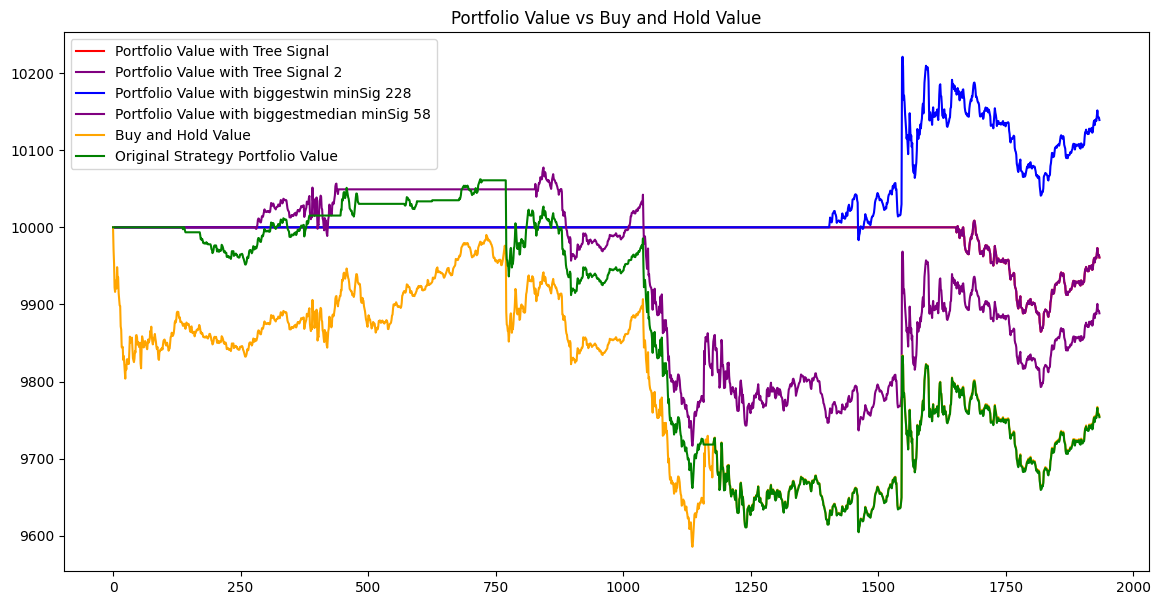

In [30]:
portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=1, signalcolumnname="tree_signal")
portfolioTree2, buyHoldTree2, tradesTree2, myTradeMetricTree2 = oneRun(signalthreshold=1, signalcolumnname="tree_signal_2")

plt.figure(figsize=(14, 7))
plt.plot(portfolioTree, label='Portfolio Value with Tree Signal', color='red')
plt.plot(portfolioTree2, label='Portfolio Value with Tree Signal 2', color='purple' )
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

meaning i have successfully backtracked which values they are using and even improved on it...

### finetuning my tree signal

In [31]:
allResults = []

for i in tqdm([1,5,10,100,200,300] + [randint(1, 1000) for _ in range(100)]):
    portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=i, signalcolumnname="tree_signal")
    allResults.append({
        "signalthreshold": i,
        "finalPortfolio": portfolioTree[-1],
        "finalBuyHold": buyHoldTree[-1],
        "medianTrade": np.median(tradesTree) if tradesTree else 0,
        "myTradeMetric": myTradeMetricTree,
        "winOverBuyHold": portfolioTree[-1] - buyHoldTree[-1],
        "nrTrades": len(tradesTree),
    })

allResults = pd.DataFrame(allResults)
allResults = allResults.sort_values(by="winOverBuyHold", ascending=False)
allResults.head(10)

100%|██████████| 106/106 [00:05<00:00, 19.35it/s]


,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
95,169,10097.120229,9755.084834,0,NaN,342.035395,0
49,185,10071.830893,9755.084834,0,NaN,316.746059,0
70,159,10071.024979,9755.084834,0,NaN,315.940145,0
29,180,10070.710895,9755.084834,0,NaN,315.626061,0
23,131,10066.144274,9755.084834,0,NaN,311.059440,0
9,125,10062.258978,9755.084834,0,NaN,307.174144,0
82,156,10059.900070,9755.084834,0,NaN,304.815235,0
15,153,10058.851522,9755.084834,0,NaN,303.766688,0
68,126,10056.420959,9755.084834,0,NaN,301.336125,0
56,193,10047.249839,9755.084834,0,NaN,292.165005,0
